# **WEEK-1**

In [1]:
# Import the pandas library and give it the alias 'pd'
# (used for data manipulation and analysis, especially with DataFrames)
import pandas as pd

# Define the file path of the CSV dataset stored in Google Drive
path = "/content/drive/MyDrive/Colab Notebooks/Indian_Kids_Screen_Time.csv"

# Read the CSV file from the specified path and store it in a pandas DataFrame named 'df'
df = pd.read_csv(path)

# Display the first 5 rows of the DataFrame to quickly inspect the data
df.head()


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [2]:
df.describe() #df.describe() helps you summarize numerical data quickly.

,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio
count,9712.000000,9712.000000,9712.000000
mean,12.979201,4.352837,0.427226
std,3.162437,1.718232,0.073221
min,8.000000,0.000000,0.300000
25%,10.000000,3.410000,0.370000
50%,13.000000,4.440000,0.430000
75%,16.000000,5.380000,0.480000
max,18.000000,13.890000,0.600000


In [3]:
df.shape #no.of rows and columns

(9712, 8)

In [4]:
df1 = df["Primary_Device"][1:8]  # Select 'Primary_Device' column and slice rows from index 1 to 7 (end index excluded)
df1  # Display the resulting sliced Series

,Primary_Device
1,Laptop
2,TV
3,Laptop
4,Smartphone
5,Smartphone
6,TV
7,TV


In [5]:
df1 = df[["Primary_Device", "Age"]][2:10:2]  # Select 'Primary_Device' and 'Age' columns, then take every 2nd row from index 2 to 9
df1  # Display the resulting sliced DataFrame


,Primary_Device,Age
2,TV,18
4,Smartphone,12
6,TV,17
8,Laptop,14


In [6]:
print("Columns:", df.columns)  # Print all column names present in the DataFrame

print("\nData Types:\n", df.dtypes)  # Print data types of each column in the DataFrame

print("\nUnique Primary Devices:", df['Primary_Device'].nunique())  # Print the number of unique values in the 'Primary_Device' column

print("\nPrimary Device Value Counts:\n", df['Primary_Device'].value_counts())  # Print how many times each device type appears in 'Primary_Device'


Columns: Index(['Age', 'Gender', 'Avg_Daily_Screen_Time_hr', 'Primary_Device',
       'Exceeded_Recommended_Limit', 'Educational_to_Recreational_Ratio',
       'Health_Impacts', 'Urban_or_Rural'],
      dtype='object')

Data Types:
 Age                                    int64
Gender                                object
Avg_Daily_Screen_Time_hr             float64
Primary_Device                        object
Exceeded_Recommended_Limit              bool
Educational_to_Recreational_Ratio    float64
Health_Impacts                        object
Urban_or_Rural                        object
dtype: object

Unique Primary Devices: 4

Primary Device Value Counts:
 Primary_Device
Smartphone    4568
TV            2487
Laptop        1433
Tablet        1224
Name: count, dtype: int64


In [7]:
print("\nNull values per column:\n", df.isnull().sum())  # Print the number of null (missing) values in each column with a label
print(df.isnull().sum())  # Print only the count of missing values per column (without any label text)
df['Gender'] = df['Gender'].astype('category')  # Convert the 'Gender' column data type to 'category' for efficient storage and analysis
df['Urban_or_Rural'] = df['Urban_or_Rural'].astype('category')  # Convert the 'Urban_or_Rural' column data type to 'category'
print(df)  # Print the entire DataFrame after applying data type conversions


Null values per column:
 Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64
Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64
      Age  Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
0      14    Male                      3.99     Smartphone   
1      11  Female                      4.61         Laptop   
2      18  Female                      3.73             TV   
3      15  Female           

# **Week 2 – Univariate & Bivariate Analysis**

**Day 1:** Histograms & KDE plots for continuous variables (screen time, age)

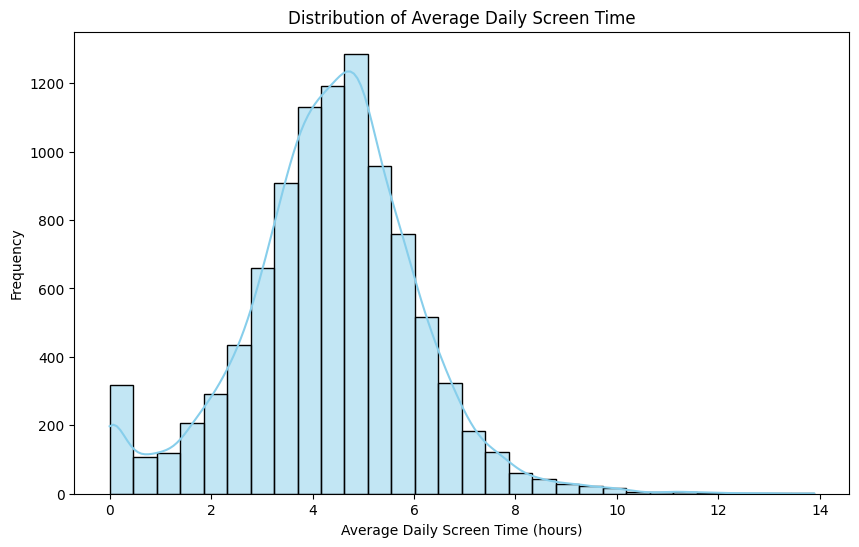

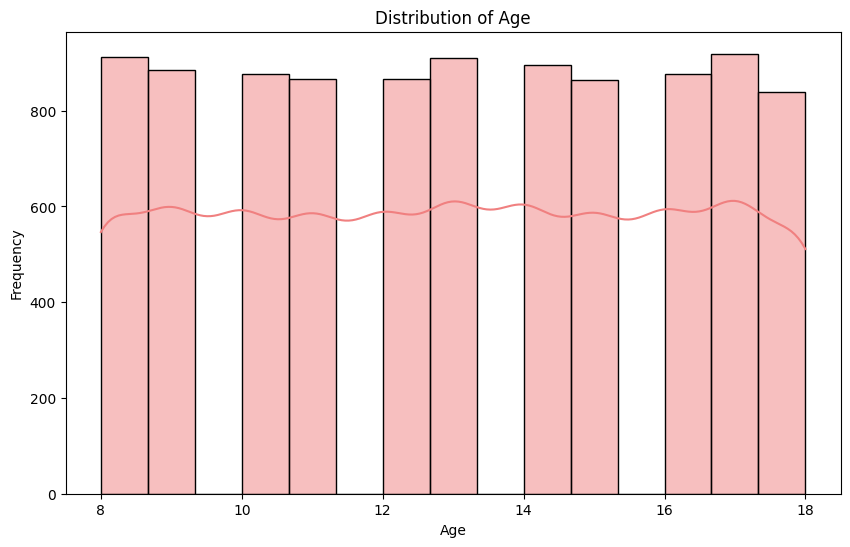

In [8]:
import matplotlib.pyplot as plt  # Import the matplotlib library for creating static, animated, and interactive visualizations
import seaborn as sns  # Import the seaborn library for statistical data visualization

plt.figure(figsize=(10, 6))  # Create a new figure with a size of 10x6 inches
sns.histplot(df['Avg_Daily_Screen_Time_hr'], kde=True, bins=30, color='skyblue')  # Plot a histogram with KDE for 'Avg_Daily_Screen_Time_hr' using 30 bins and skyblue color
plt.title('Distribution of Average Daily Screen Time')  # Set the title of the plot
plt.xlabel('Average Daily Screen Time (hours)')  # Label the x-axis
plt.ylabel('Frequency')  # Label the y-axis
plt.show()  # Display the first histogram plot

plt.figure(figsize=(10, 6))  # Create another figure with a size of 10x6 inches
sns.histplot(df['Age'], kde=True, bins=15, color='lightcoral')  # Plot a histogram with KDE for 'Age' using 15 bins and lightcoral color
plt.title('Distribution of Age')  # Set the title for the second plot
plt.xlabel('Age')  # Label the x-axis
plt.ylabel('Frequency')  # Label the y-axis
plt.show()  # Display the second histogram plot

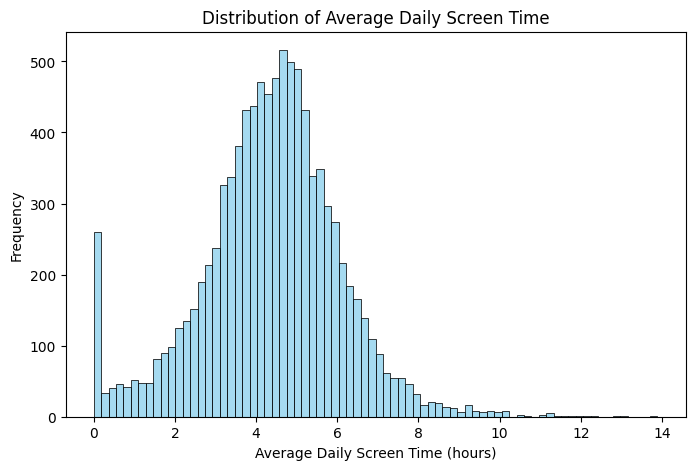

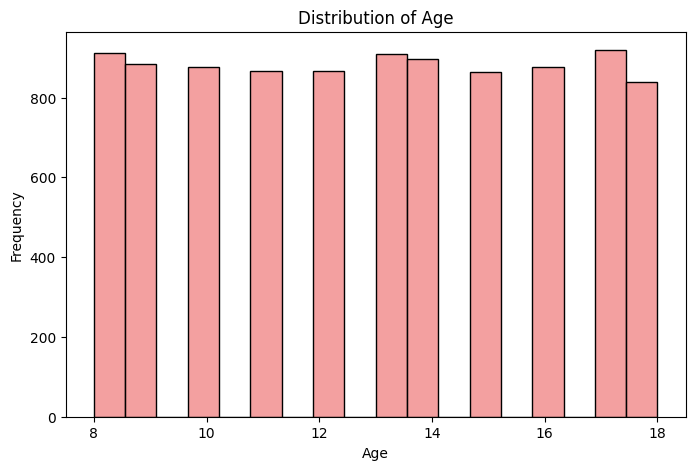

In [9]:
# Histogram for 'Avg_Daily_Screen_Time_hr'
plt.figure(figsize=(8, 5))
sns.histplot(df['Avg_Daily_Screen_Time_hr'], color="skyblue")
plt.title("Distribution of Average Daily Screen Time")
plt.xlabel("Average Daily Screen Time (hours)")
plt.ylabel("Frequency")
plt.show()

# Histogram for 'Age'
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], color="lightcoral")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

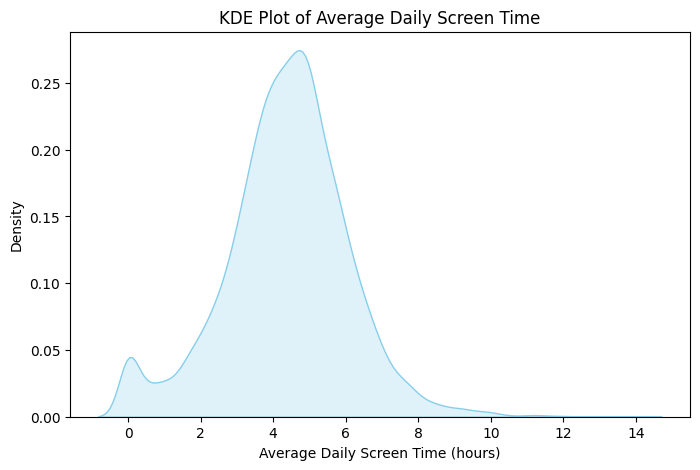

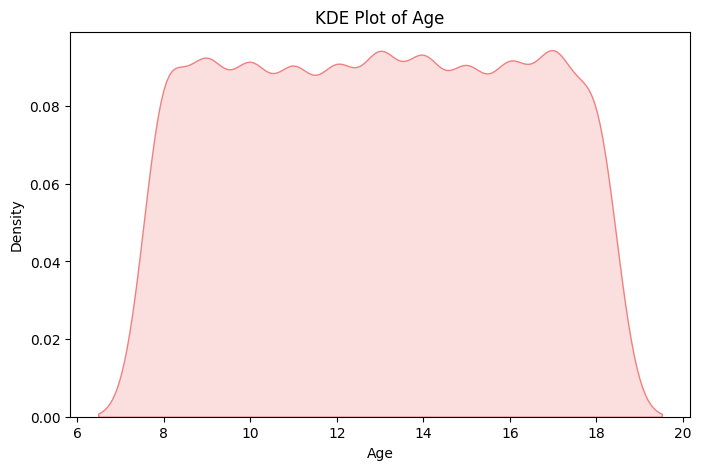

In [10]:
# KDE plot for 'Avg_Daily_Screen_Time_hr'
plt.figure(figsize=(8, 5))
sns.kdeplot(df['Avg_Daily_Screen_Time_hr'], fill=True, color="skyblue")
plt.title("KDE Plot of Average Daily Screen Time")
plt.xlabel("Average Daily Screen Time (hours)")
plt.ylabel("Density")
plt.show()

# KDE plot for 'Age'
plt.figure(figsize=(8, 5))
sns.kdeplot(df['Age'], fill=True, color="lightcoral")
plt.title("KDE Plot of Age")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

**Day 2:**  Countplots for categorical variables (gender, device type, location)

/tmp/ipython-input-952847752.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='viridis')


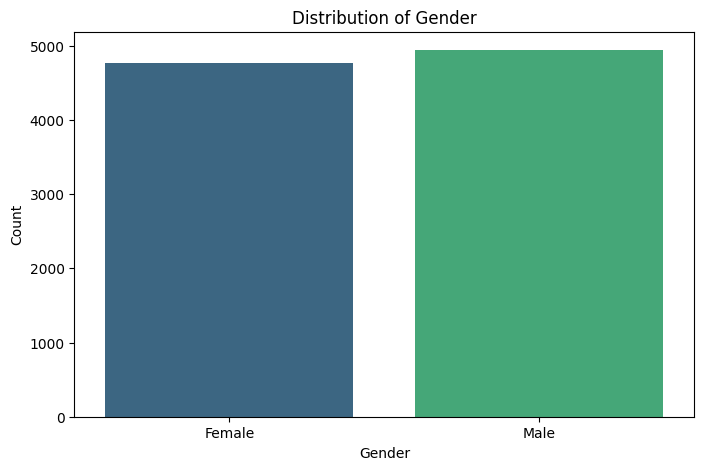

/tmp/ipython-input-952847752.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Primary_Device', palette='plasma')


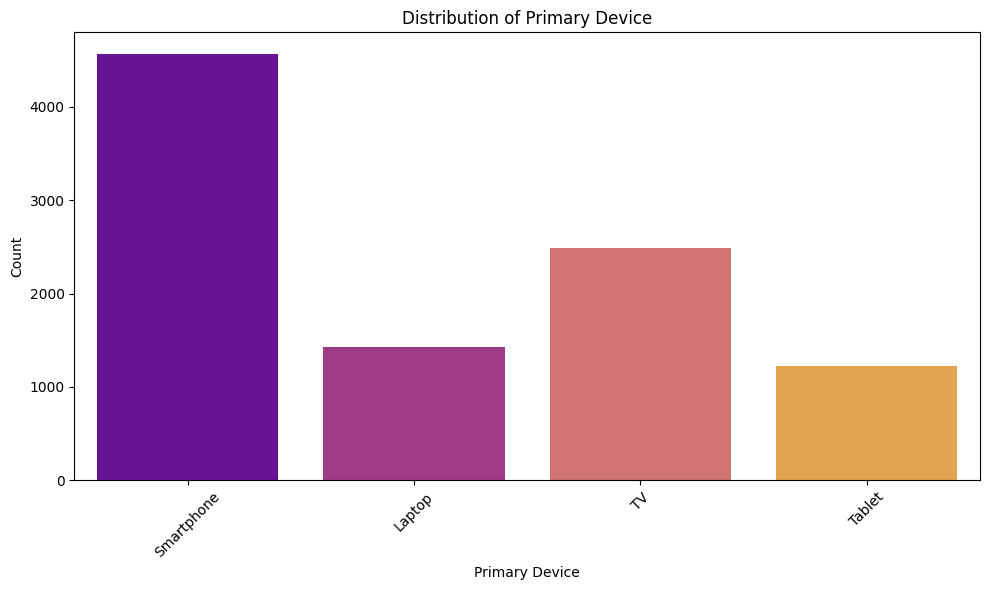

/tmp/ipython-input-952847752.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Urban_or_Rural', palette='cividis')


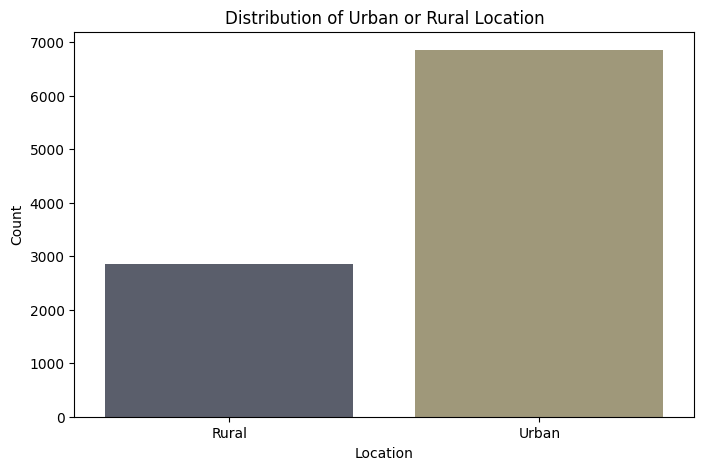

In [11]:
# Set the figure size for the plots
plt.figure(figsize=(8, 5))
# Create a countplot of the 'Gender' column with a color palette
sns.countplot(data=df, x='Gender', palette='viridis')
# Set the title of the plot
plt.title('Distribution of Gender')
# Set the label for the x-axis
plt.xlabel('Gender')
# Set the label for the y-axis
plt.ylabel('Count')
# Display the plot
plt.show()

# Set the figure size for the plots
plt.figure(figsize=(10, 6))
# Create a countplot of the 'Primary_Device' column with a color palette
sns.countplot(data=df, x='Primary_Device', palette='plasma')
# Set the title of the plot
plt.title('Distribution of Primary Device')
# Set the label for the x-axis
plt.xlabel('Primary Device')
# Set the label for the y-axis
plt.ylabel('Count')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# Adjust layout to prevent labels from overlapping
plt.tight_layout()
# Display the plot
plt.show()

# Set the figure size for the plots
plt.figure(figsize=(8, 5))
# Create a countplot of the 'Urban_or_Rural' column with a color palette
sns.countplot(data=df, x='Urban_or_Rural', palette='cividis')
# Set the title of the plot
plt.title('Distribution of Urban or Rural Location')
# Set the label for the x-axis
plt.xlabel('Location')
# Set the label for the y-axis
plt.ylabel('Count')
# Display the plot
plt.show()

**Day 3:**  Boxplots & violin plots (screen time by gender, by age group)

/tmp/ipython-input-2750696831.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Avg_Daily_Screen_Time_hr', palette='viridis')


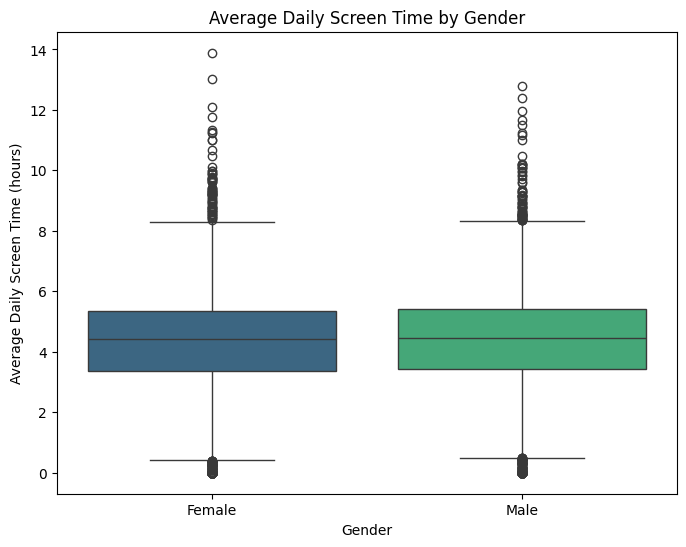

/tmp/ipython-input-2750696831.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Gender', y='Avg_Daily_Screen_Time_hr', palette='plasma')


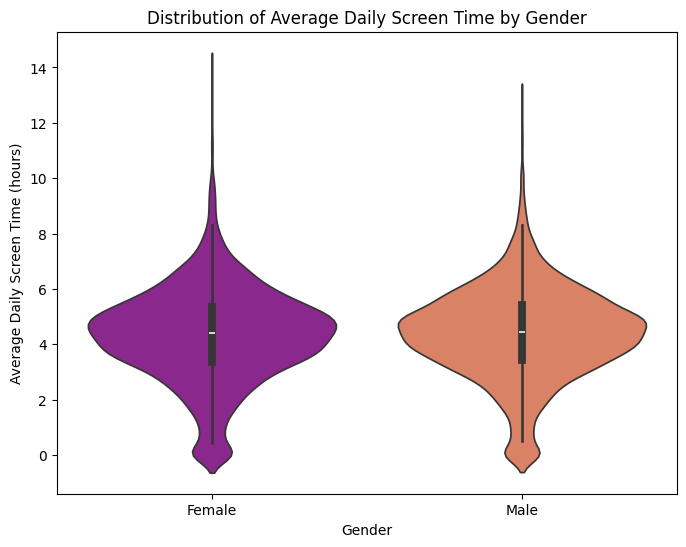

/tmp/ipython-input-2750696831.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Age_Group', y='Avg_Daily_Screen_Time_hr', palette='cividis')


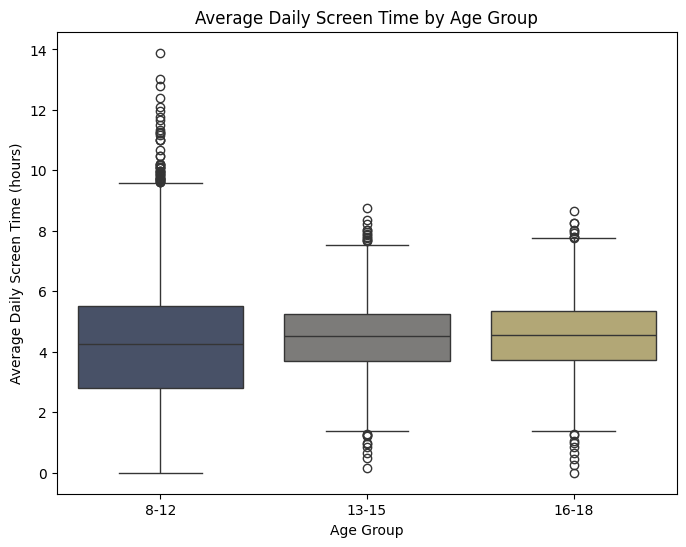

/tmp/ipython-input-2750696831.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Age_Group', y='Avg_Daily_Screen_Time_hr', palette='magma')


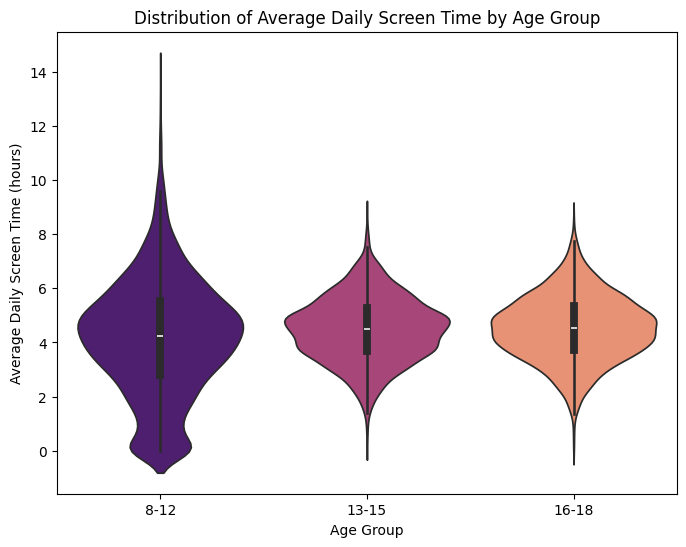

In [12]:
# Create age groups for analysis
# Define the bins for age groups (e.g., 8-12, 13-15, 16-18)
bins = [8, 12, 15, 18]
# Define the labels for the age groups
labels = ['8-12', '13-15', '16-18']
# Create a new column 'Age_Group' by categorizing 'Age' based on the defined bins and labels
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Boxplot of screen time by gender
# Set the figure size for the plot
plt.figure(figsize=(8, 6))
# Create a boxplot with 'Gender' on the x-axis and 'Avg_Daily_Screen_Time_hr' on the y-axis, with a color palette
sns.boxplot(data=df, x='Gender', y='Avg_Daily_Screen_Time_hr', palette='viridis')
# Set the title of the plot
plt.title('Average Daily Screen Time by Gender')
# Set the label for the x-axis
plt.xlabel('Gender')
# Set the label for the y-axis
plt.ylabel('Average Daily Screen Time (hours)')
# Display the plot
plt.show()

# Violin plot of screen time by gender
# Set the figure size for the plot
plt.figure(figsize=(8, 6))
# Create a violin plot with 'Gender' on the x-axis and 'Avg_Daily_Screen_Time_hr' on the y-axis, with a color palette
sns.violinplot(data=df, x='Gender', y='Avg_Daily_Screen_Time_hr', palette='plasma')
# Set the title of the plot
plt.title('Distribution of Average Daily Screen Time by Gender')
# Set the label for the x-axis
plt.xlabel('Gender')
# Set the label for the y-axis
plt.ylabel('Average Daily Screen Time (hours)')
# Display the plot
plt.show()

# Boxplot of screen time by age group
# Set the figure size for the plot
plt.figure(figsize=(8, 6))
# Create a boxplot with 'Age_Group' on the x-axis and 'Avg_Daily_Screen_Time_hr' on the y-axis, with a color palette
sns.boxplot(data=df, x='Age_Group', y='Avg_Daily_Screen_Time_hr', palette='cividis')
# Set the title of the plot
plt.title('Average Daily Screen Time by Age Group')
# Set the label for the x-axis
plt.xlabel('Age Group')
# Set the label for the y-axis
plt.ylabel('Average Daily Screen Time (hours)')
# Display the plot
plt.show()

# Violin plot of screen time by age group
# Set the figure size for the plot
plt.figure(figsize=(8, 6))
# Create a violin plot with 'Age_Group' on the x-axis and 'Avg_Daily_Screen_Time_hr' on the y-axis, with a color palette
sns.violinplot(data=df, x='Age_Group', y='Avg_Daily_Screen_Time_hr', palette='magma')
# Set the title of the plot
plt.title('Distribution of Average Daily Screen Time by Age Group')
# Set the label for the x-axis
plt.xlabel('Age Group')
# Set the label for the y-axis
plt.ylabel('Average Daily Screen Time (hours)')
# Display the plot
plt.show()

**Day 4:**  Scatterplots (age vs screen time)

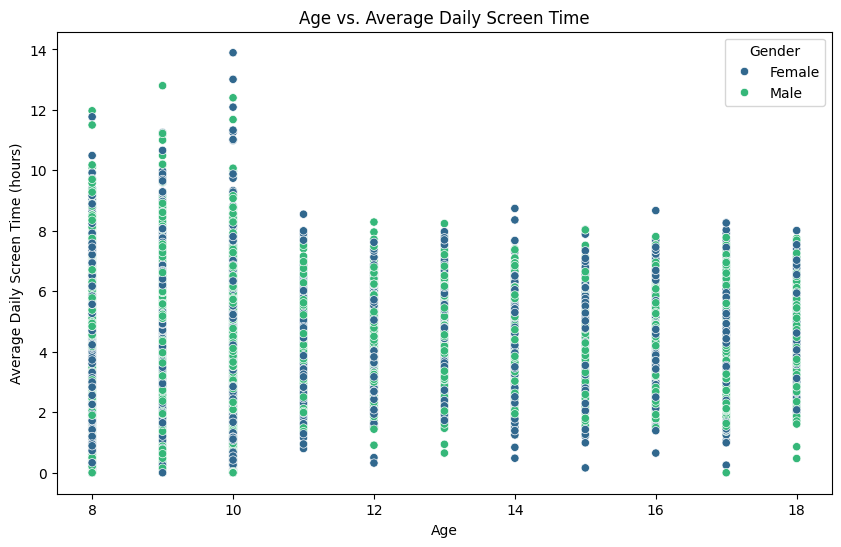

In [13]:
# Set the figure size for the plot
plt.figure(figsize=(10, 6))
# Create a scatterplot with 'Age' on the x-axis and 'Avg_Daily_Screen_Time_hr' on the y-axis
# Adding a color palette for visual appeal and hue based on Gender
sns.scatterplot(data=df, x='Age', y='Avg_Daily_Screen_Time_hr', palette='viridis', hue='Gender')
# Set the title of the plot
plt.title('Age vs. Average Daily Screen Time')
# Set the label for the x-axis
plt.xlabel('Age')
# Set the label for the y-axis
plt.ylabel('Average Daily Screen Time (hours)')
# Display the plot
plt.show()

**Day 5:** Write observations for each plot

# **Week 3 –  Comparative Analysis**

**Day 1:** Grouped barplots (weekday vs weekend by gender)

/tmp/ipython-input-1578371552.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Gender', y='Avg_Daily_Screen_Time_hr', palette='viridis') # Create the barplot with gender on x, screen time on y, and hue for weekday/weekend


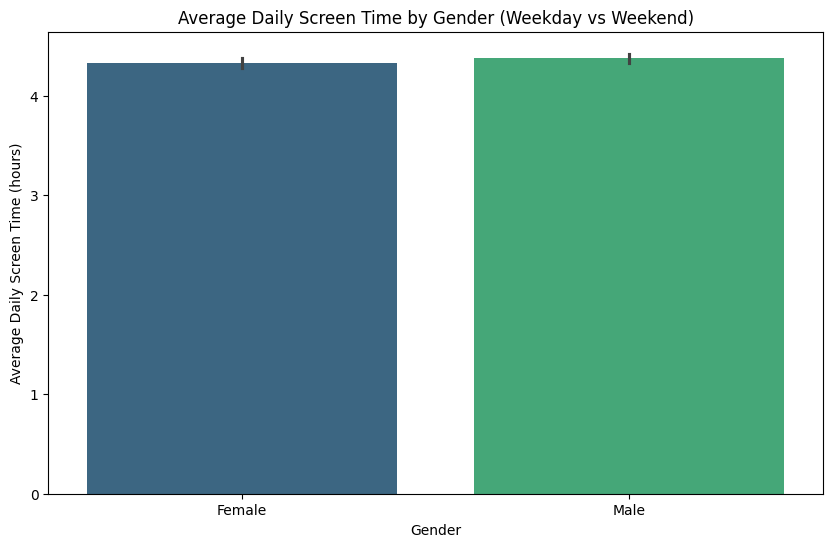

In [15]:
# Create the grouped barplot
plt.figure(figsize=(10, 6))  # Set the figure size for the plot
sns.barplot(data=df, x='Gender', y='Avg_Daily_Screen_Time_hr', palette='viridis') # Create the barplot with gender on x, screen time on y, and hue for weekday/weekend
plt.title('Average Daily Screen Time by Gender (Weekday vs Weekend)')  # Set the title of the plot
plt.xlabel('Gender')  # Set the label for the x-axis
plt.ylabel('Average Daily Screen Time (hours)')  # Set the label for the y-axis
plt.show()  # Display the plot

**Day 2:** FacetGrid (screen time by device × gender)

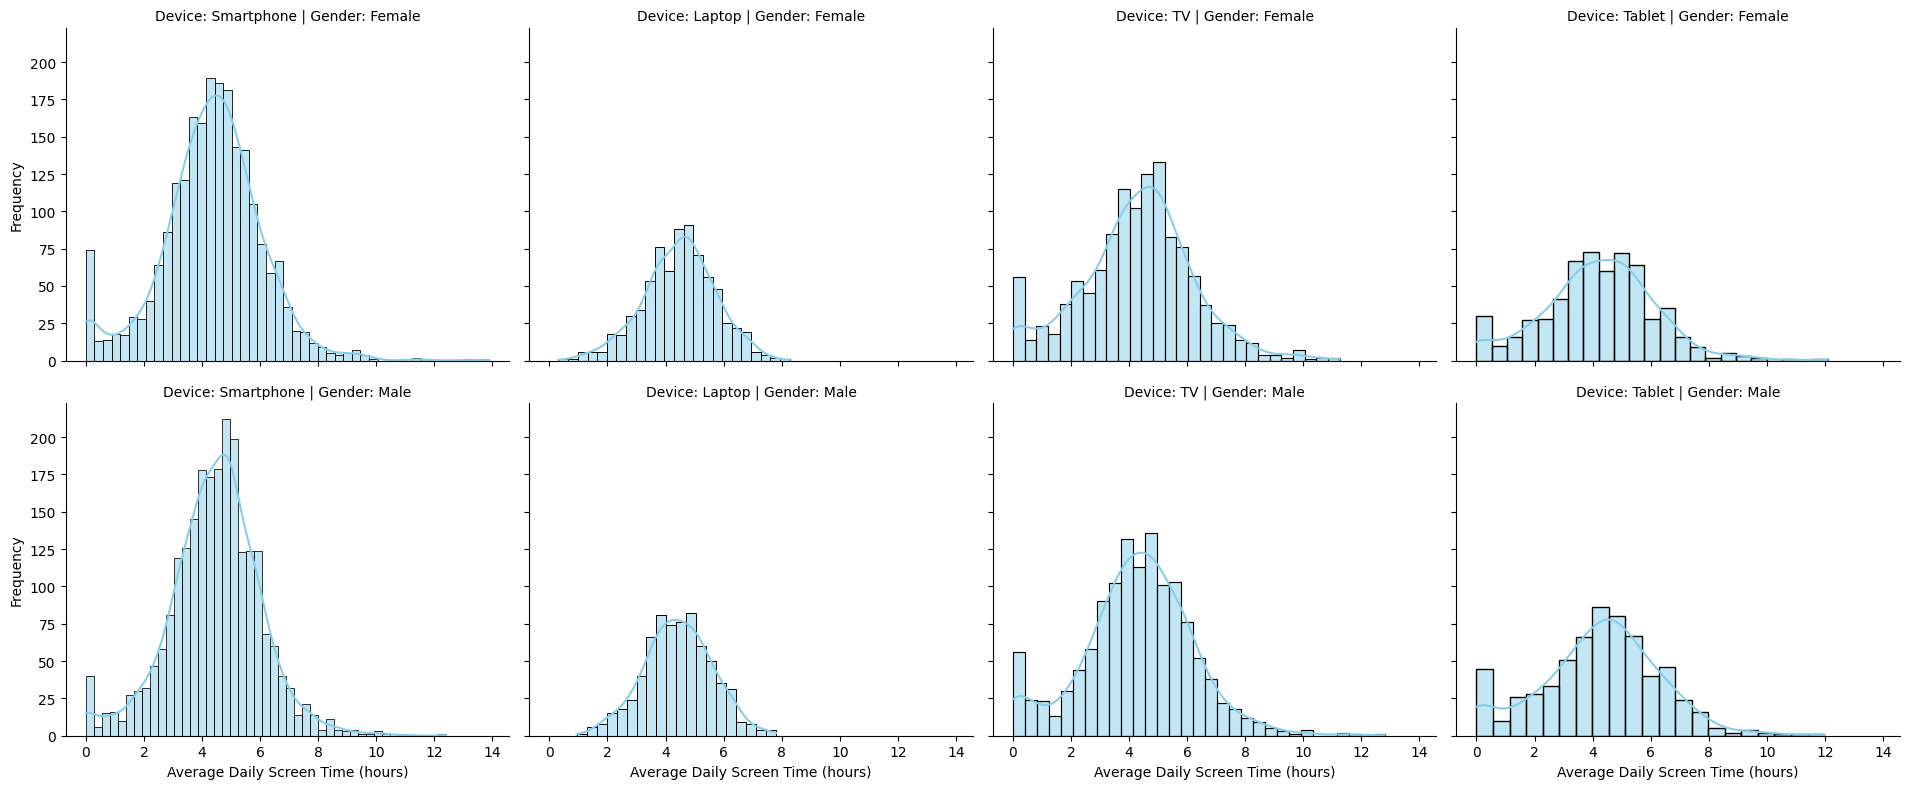

In [16]:
# Create a FacetGrid to visualize the relationship between screen time, device, and gender
g = sns.FacetGrid(df, col='Primary_Device', row='Gender', height=4, aspect=1.2) # Initialize a FacetGrid with 'Primary_Device' as columns and 'Gender' as rows
g.map(sns.histplot, 'Avg_Daily_Screen_Time_hr', kde=True, color='skyblue') # Map a histogram with KDE to each facet, using 'Avg_Daily_Screen_Time_hr' and a skyblue color
g.set_titles("Device: {col_name} | Gender: {row_name}") # Set the titles for each facet, showing the device and gender
g.set_axis_labels("Average Daily Screen Time (hours)", "Frequency") # Set the labels for the x and y axes of the facets
plt.tight_layout() # Adjust the layout to prevent titles and labels from overlapping
plt.show() # Display the plot

**Day 3:**  Pairplot (relationships between numerical variables)

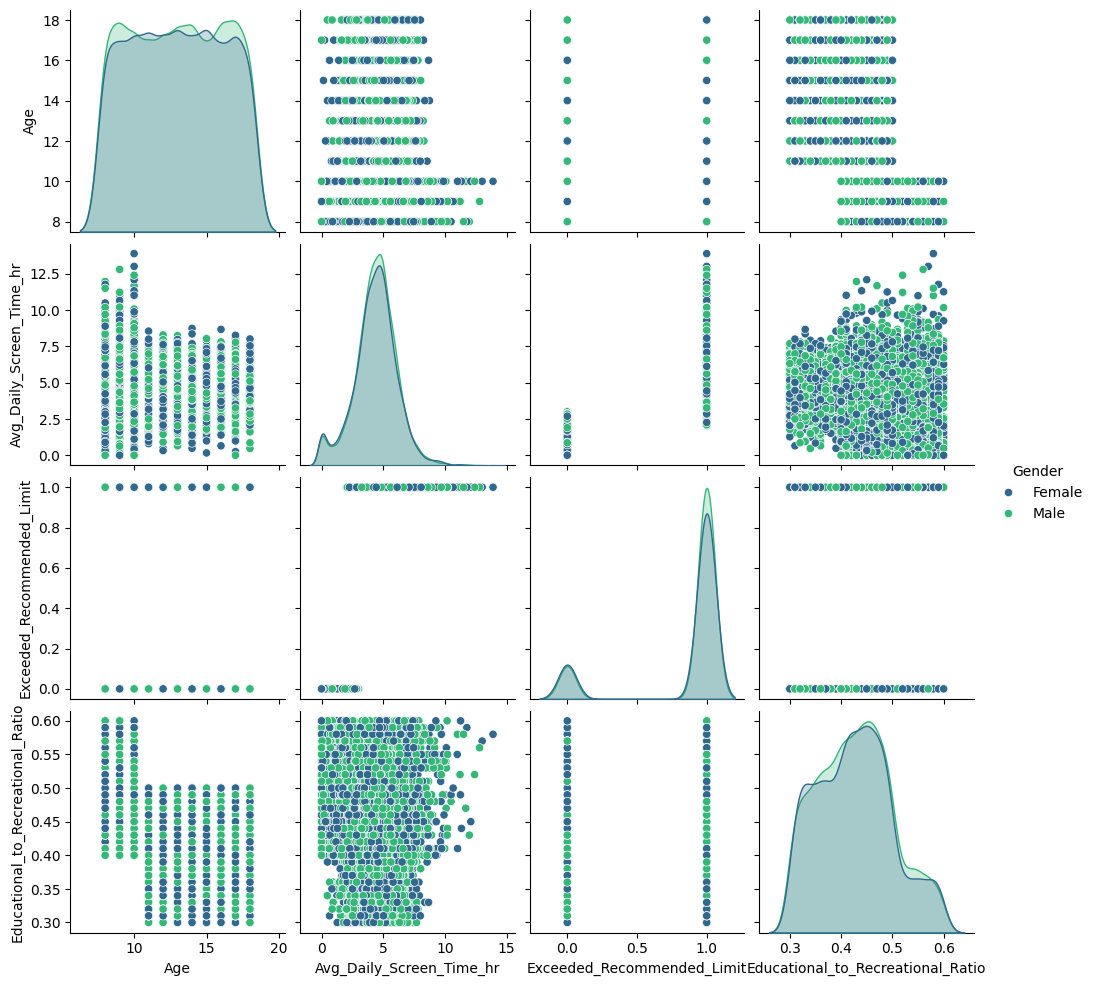

In [17]:
# Create a pairplot to visualize relationships between numerical variables
# The hue parameter is set to 'Gender' to color the points based on gender
# The palette parameter is set to 'viridis' to define the color scheme
sns.pairplot(df, hue='Gender', palette='viridis')

# Set the title of the plot (optional, as pairplot generates multiple subplots)
# plt.title('Pairwise Relationships Between Numerical Variables')

# Display the plot
plt.show()

**Day 4:**  Heatmap (correlation between screen time, age, etc.)

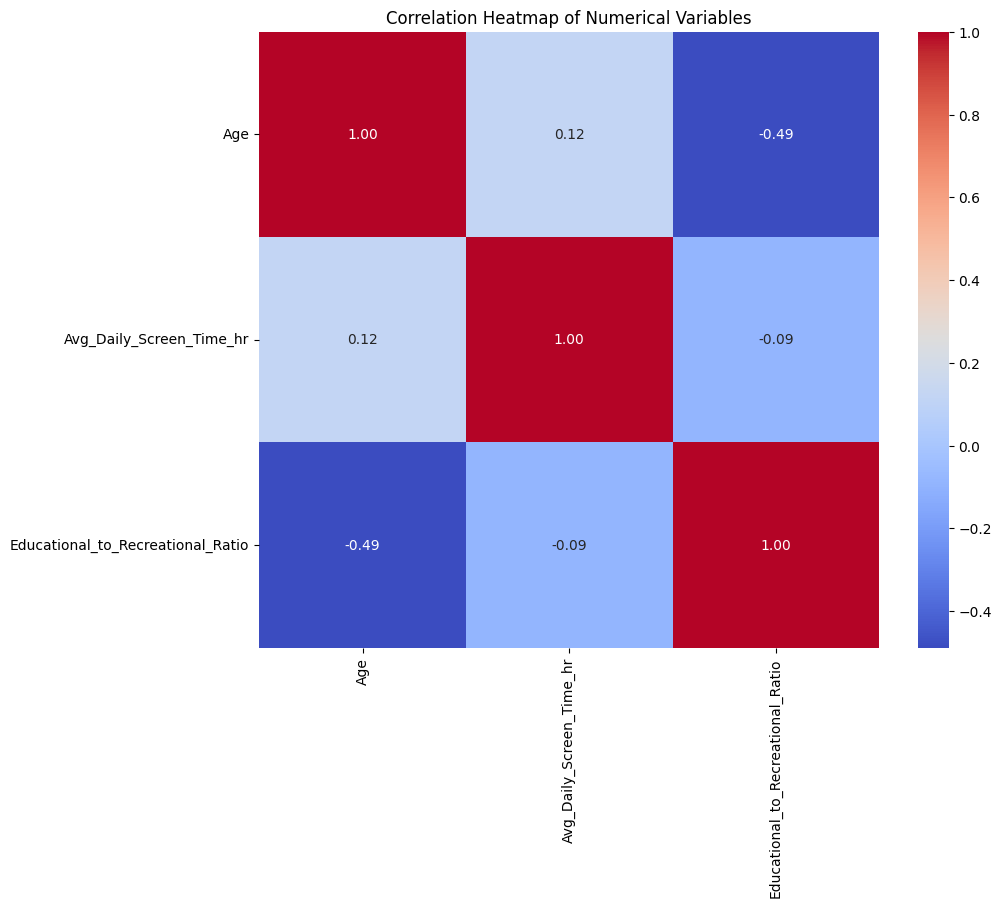

In [18]:
# Calculate the correlation matrix for numerical columns
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Set the figure size for the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap using seaborn
# annot=True displays the correlation values on the heatmap
# cmap specifies the color map (e.g., 'coolwarm', 'viridis', 'plasma')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title of the heatmap
plt.title('Correlation Heatmap of Numerical Variables')

# Display the heatmap
plt.show()

**Day 5**

# **Week 4 – Advanced Visualizations**

**Day 1:** Distribution plots with hue (screen time by gender)

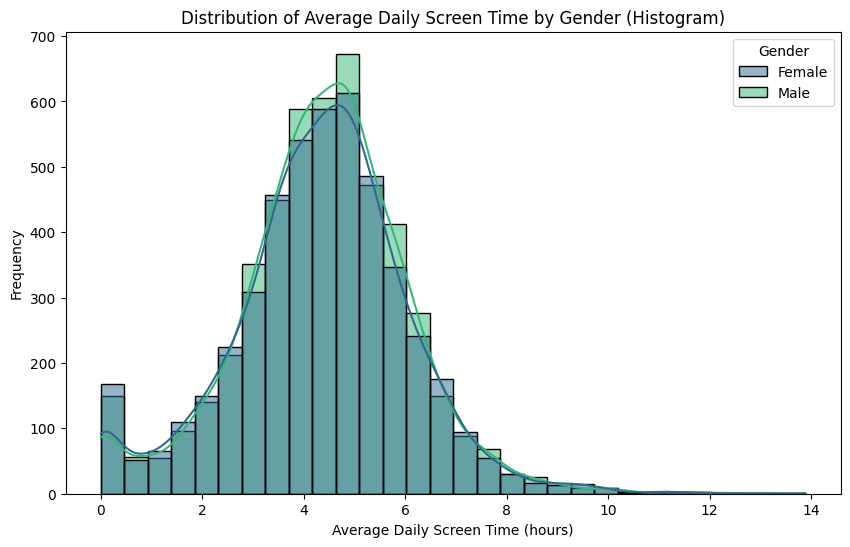

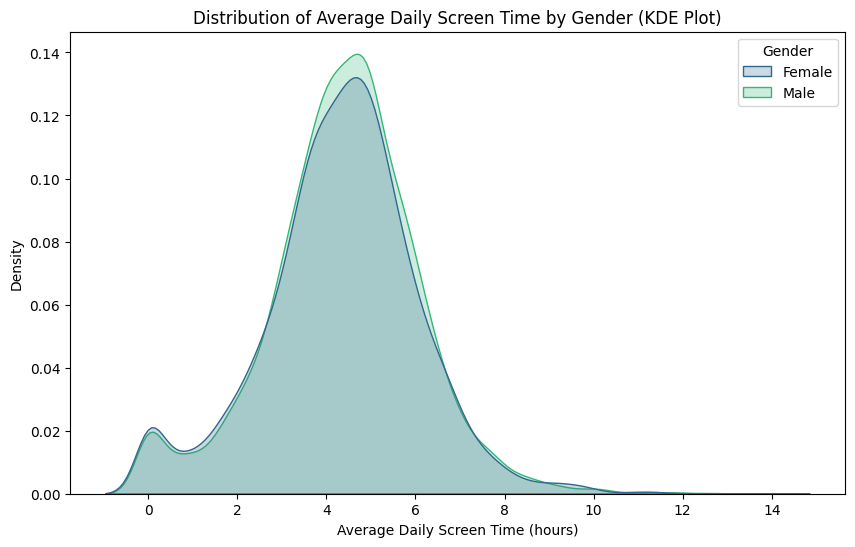

In [19]:
# Set the figure size for the plots
plt.figure(figsize=(10, 6))

# Create a histogram of 'Avg_Daily_Screen_Time_hr' with hue based on 'Gender'
# kde=True adds a Kernel Density Estimate line
# bins=30 specifies the number of bins for the histogram
# palette='viridis' sets the color scheme
sns.histplot(data=df, x='Avg_Daily_Screen_Time_hr', hue='Gender', kde=True, bins=30, palette='viridis')

# Set the title of the plot
plt.title('Distribution of Average Daily Screen Time by Gender (Histogram)')

# Set the label for the x-axis
plt.xlabel('Average Daily Screen Time (hours)')

# Set the label for the y-axis
plt.ylabel('Frequency')

# Display the plot
plt.show()

# Set the figure size for the plots
plt.figure(figsize=(10, 6))

# Create a KDE plot of 'Avg_Daily_Screen_Time_hr' with hue based on 'Gender'
# fill=True fills the area under the KDE curve
# palette='viridis' sets the color scheme
sns.kdeplot(data=df, x='Avg_Daily_Screen_Time_hr', hue='Gender', fill=True, palette='viridis')

# Set the title of the plot
plt.title('Distribution of Average Daily Screen Time by Gender (KDE Plot)')

# Set the label for the x-axis
plt.xlabel('Average Daily Screen Time (hours)')

# Set the label for the y-axis
plt.ylabel('Density')

# Display the plot
plt.show()

**Day 2:** Stacked barplots (device usage by location)

/tmp/ipython-input-11356030.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  device_location_counts = df.groupby(['Urban_or_Rural', 'Primary_Device']).size().unstack(fill_value=0)


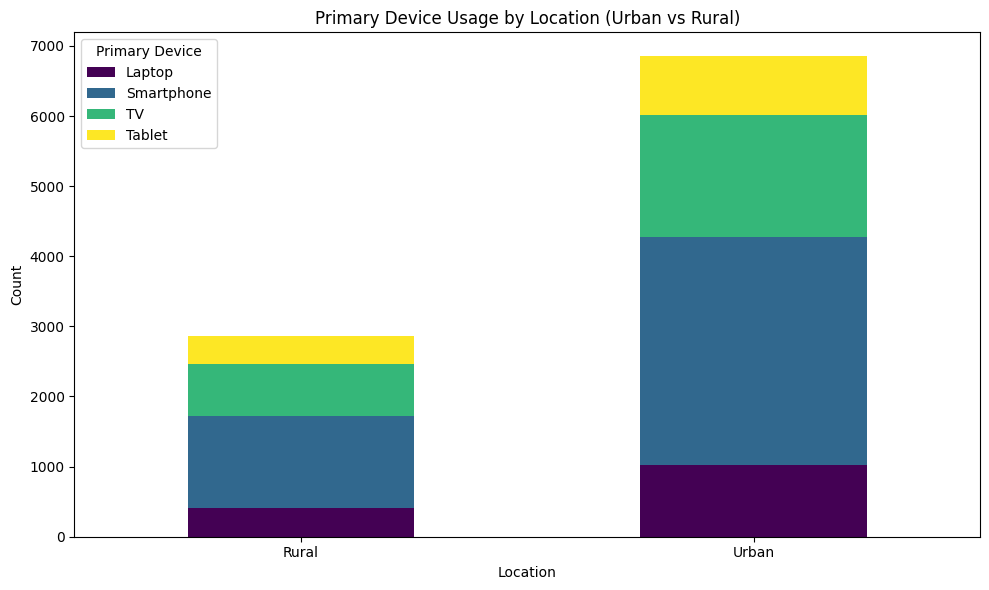

In [20]:
# Create a stacked barplot of device usage by location
# First, group the data by 'Urban_or_Rural' and 'Primary_Device' and count the occurrences
device_location_counts = df.groupby(['Urban_or_Rural', 'Primary_Device']).size().unstack(fill_value=0)

# Plot the stacked barplot
device_location_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Set the title of the plot
plt.title('Primary Device Usage by Location (Urban vs Rural)')

# Set the label for the x-axis
plt.xlabel('Location')

# Set the label for the y-axis
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add a legend to the plot
plt.legend(title='Primary Device')

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()

**Day 3:** Swarmplots/stripplots (screen time spread)

/tmp/ipython-input-1166081539.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='Gender', y='Avg_Daily_Screen_Time_hr', jitter=True, palette='viridis')


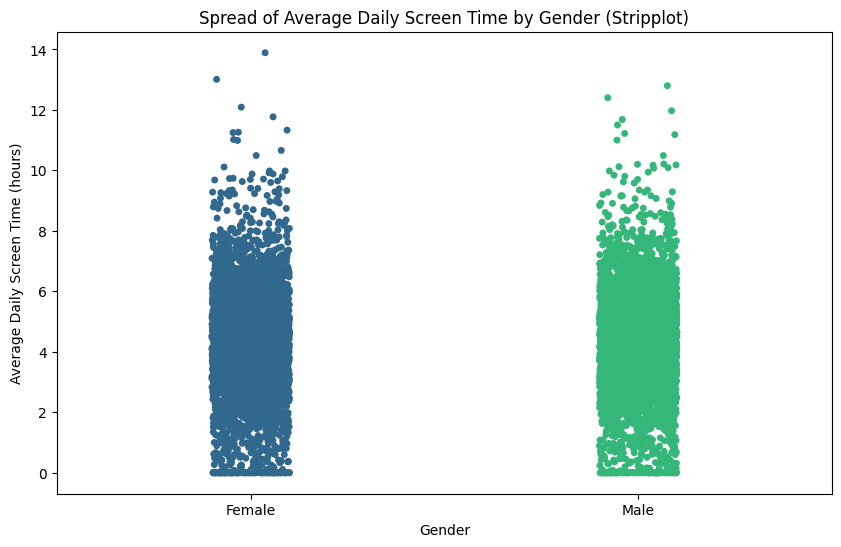

/tmp/ipython-input-1166081539.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df, x='Gender', y='Avg_Daily_Screen_Time_hr', palette='viridis')
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 49.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 51.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 68.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-

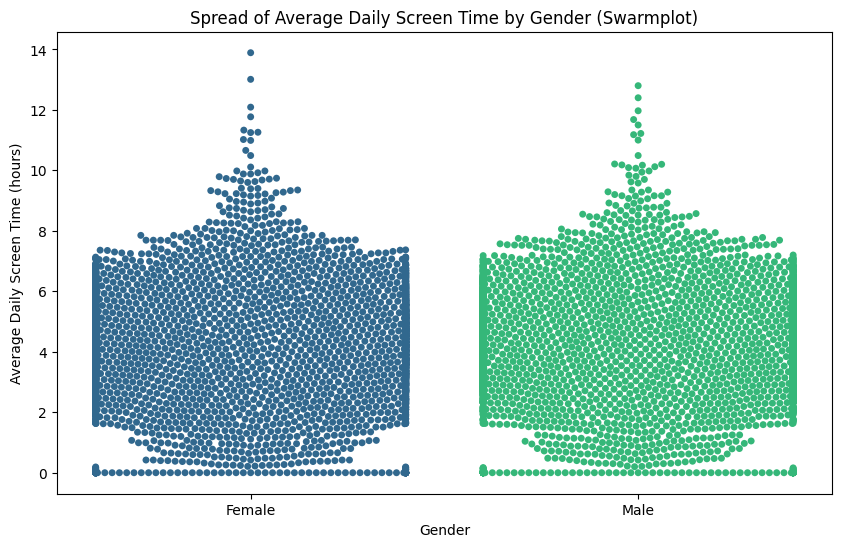

In [21]:
# Create a stripplot of 'Avg_Daily_Screen_Time_hr' with hue based on 'Gender'
# jitter=True adds a small amount of random noise to the x-axis positions to avoid overlapping points
# palette='viridis' sets the color scheme
plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x='Gender', y='Avg_Daily_Screen_Time_hr', jitter=True, palette='viridis')
plt.title('Spread of Average Daily Screen Time by Gender (Stripplot)')
plt.xlabel('Gender')
plt.ylabel('Average Daily Screen Time (hours)')
plt.show()

# Create a swarmplot of 'Avg_Daily_Screen_Time_hr' with hue based on 'Gender'
# Swarmplots are similar to stripplots but adjust the points to avoid overlap
# palette='viridis' sets the color scheme
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x='Gender', y='Avg_Daily_Screen_Time_hr', palette='viridis')
plt.title('Spread of Average Daily Screen Time by Gender (Swarmplot)')
plt.xlabel('Gender')
plt.ylabel('Average Daily Screen Time (hours)')
plt.show()

**Day 4:** Combine multiple plots into subplots

/tmp/ipython-input-640597378.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Primary_Device', palette='plasma', ax=axes[2])
/tmp/ipython-input-640597378.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Urban_or_Rural', palette='cividis', ax=axes[3])


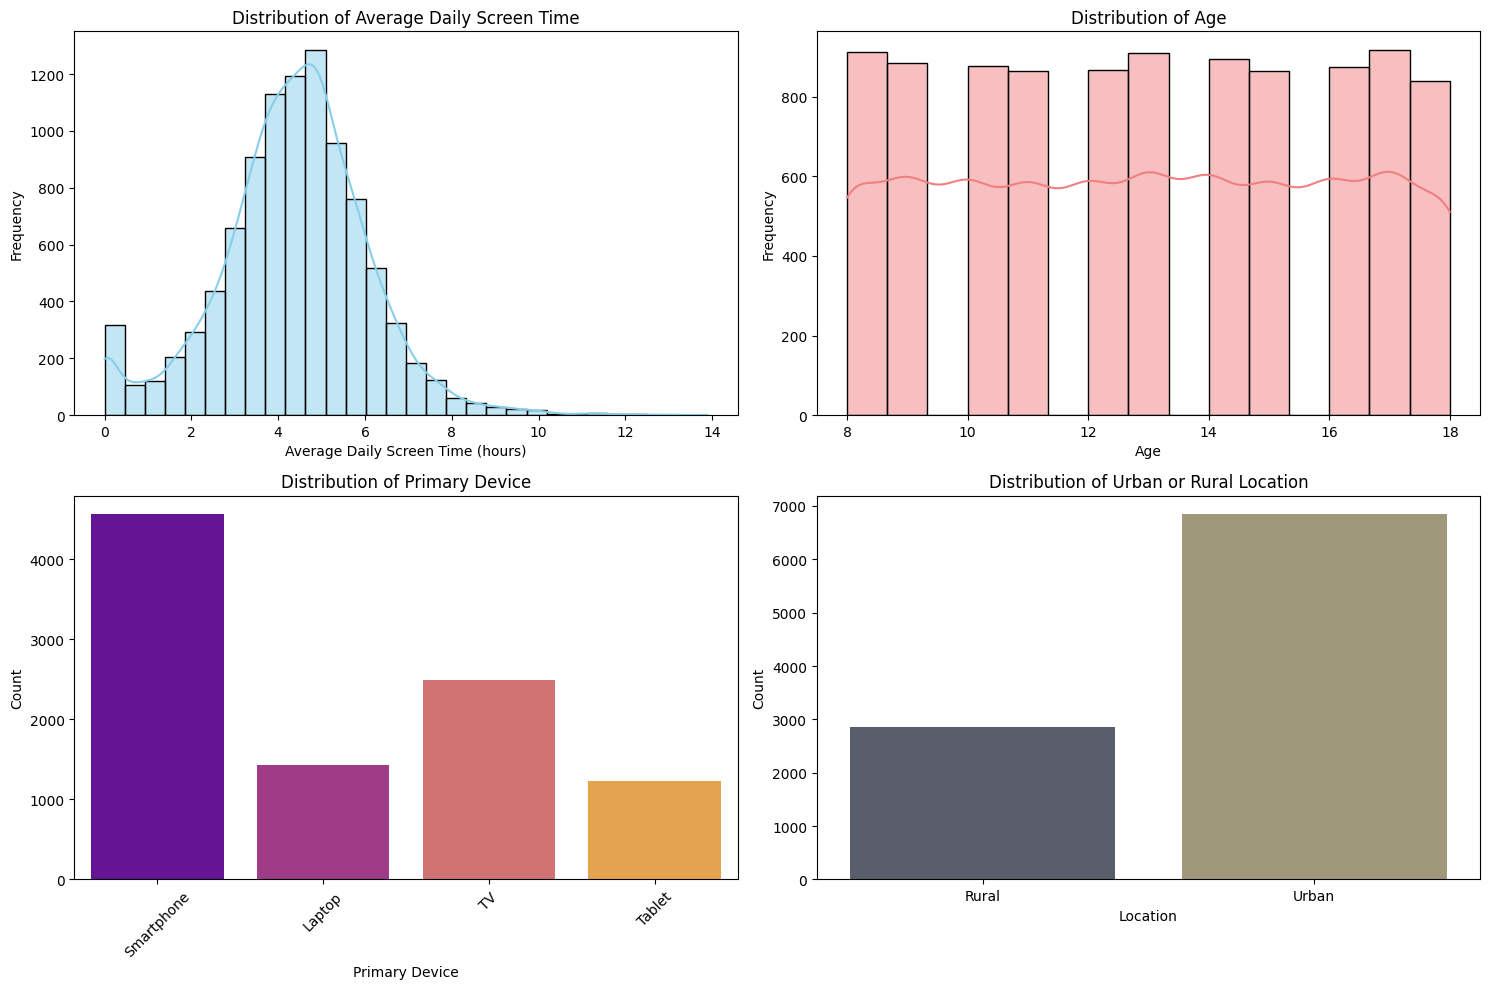

In [22]:
# Create a figure and a set of subplots
# The figure will have 2 rows and 2 columns of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot 1: Histogram of Average Daily Screen Time
sns.histplot(data=df, x='Avg_Daily_Screen_Time_hr', kde=True, bins=30, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of Average Daily Screen Time')
axes[0].set_xlabel('Average Daily Screen Time (hours)')
axes[0].set_ylabel('Frequency')

# Plot 2: Histogram of Age
sns.histplot(data=df, x='Age', kde=True, bins=15, color='lightcoral', ax=axes[1])
axes[1].set_title('Distribution of Age')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

# Plot 3: Countplot of Primary Device
sns.countplot(data=df, x='Primary_Device', palette='plasma', ax=axes[2])
axes[2].set_title('Distribution of Primary Device')
axes[2].set_xlabel('Primary Device')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45) # Rotate labels for readability

# Plot 4: Countplot of Urban or Rural Location
sns.countplot(data=df, x='Urban_or_Rural', palette='cividis', ax=axes[3])
axes[3].set_title('Distribution of Urban or Rural Location')
axes[3].set_xlabel('Location')
axes[3].set_ylabel('Count')

# Adjust layout to prevent titles and labels from overlapping
plt.tight_layout()

# Display the figure with all subplots
plt.show()